In [ ]:
pip install xgboost catboost optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 24.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import optuna


In [ ]:
df = pd.read_csv('online_shoppers_intention.csv')

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.shape

(12330, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.isna().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
df.duplicated().sum()

np.int64(125)

In [ ]:
df_processed = df.copy()
df_processed['Month'] = pd.Categorical(df_processed['Month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)
df_processed = pd.get_dummies(df_processed, columns=['Month'], prefix='Month')

In [ ]:
df_processed = pd.get_dummies(df_processed, columns=['VisitorType'], prefix='VisitorType')

In [ ]:
df_processed['Weekend'] = df_processed['Weekend'].astype(int)
df_processed['Revenue'] = df_processed['Revenue'].astype(int)

In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [ ]:
df_processed.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_June,Month_Jul,Month_Aug,Month_Sep,Month_Oct,Month_Nov,Month_Dec,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True


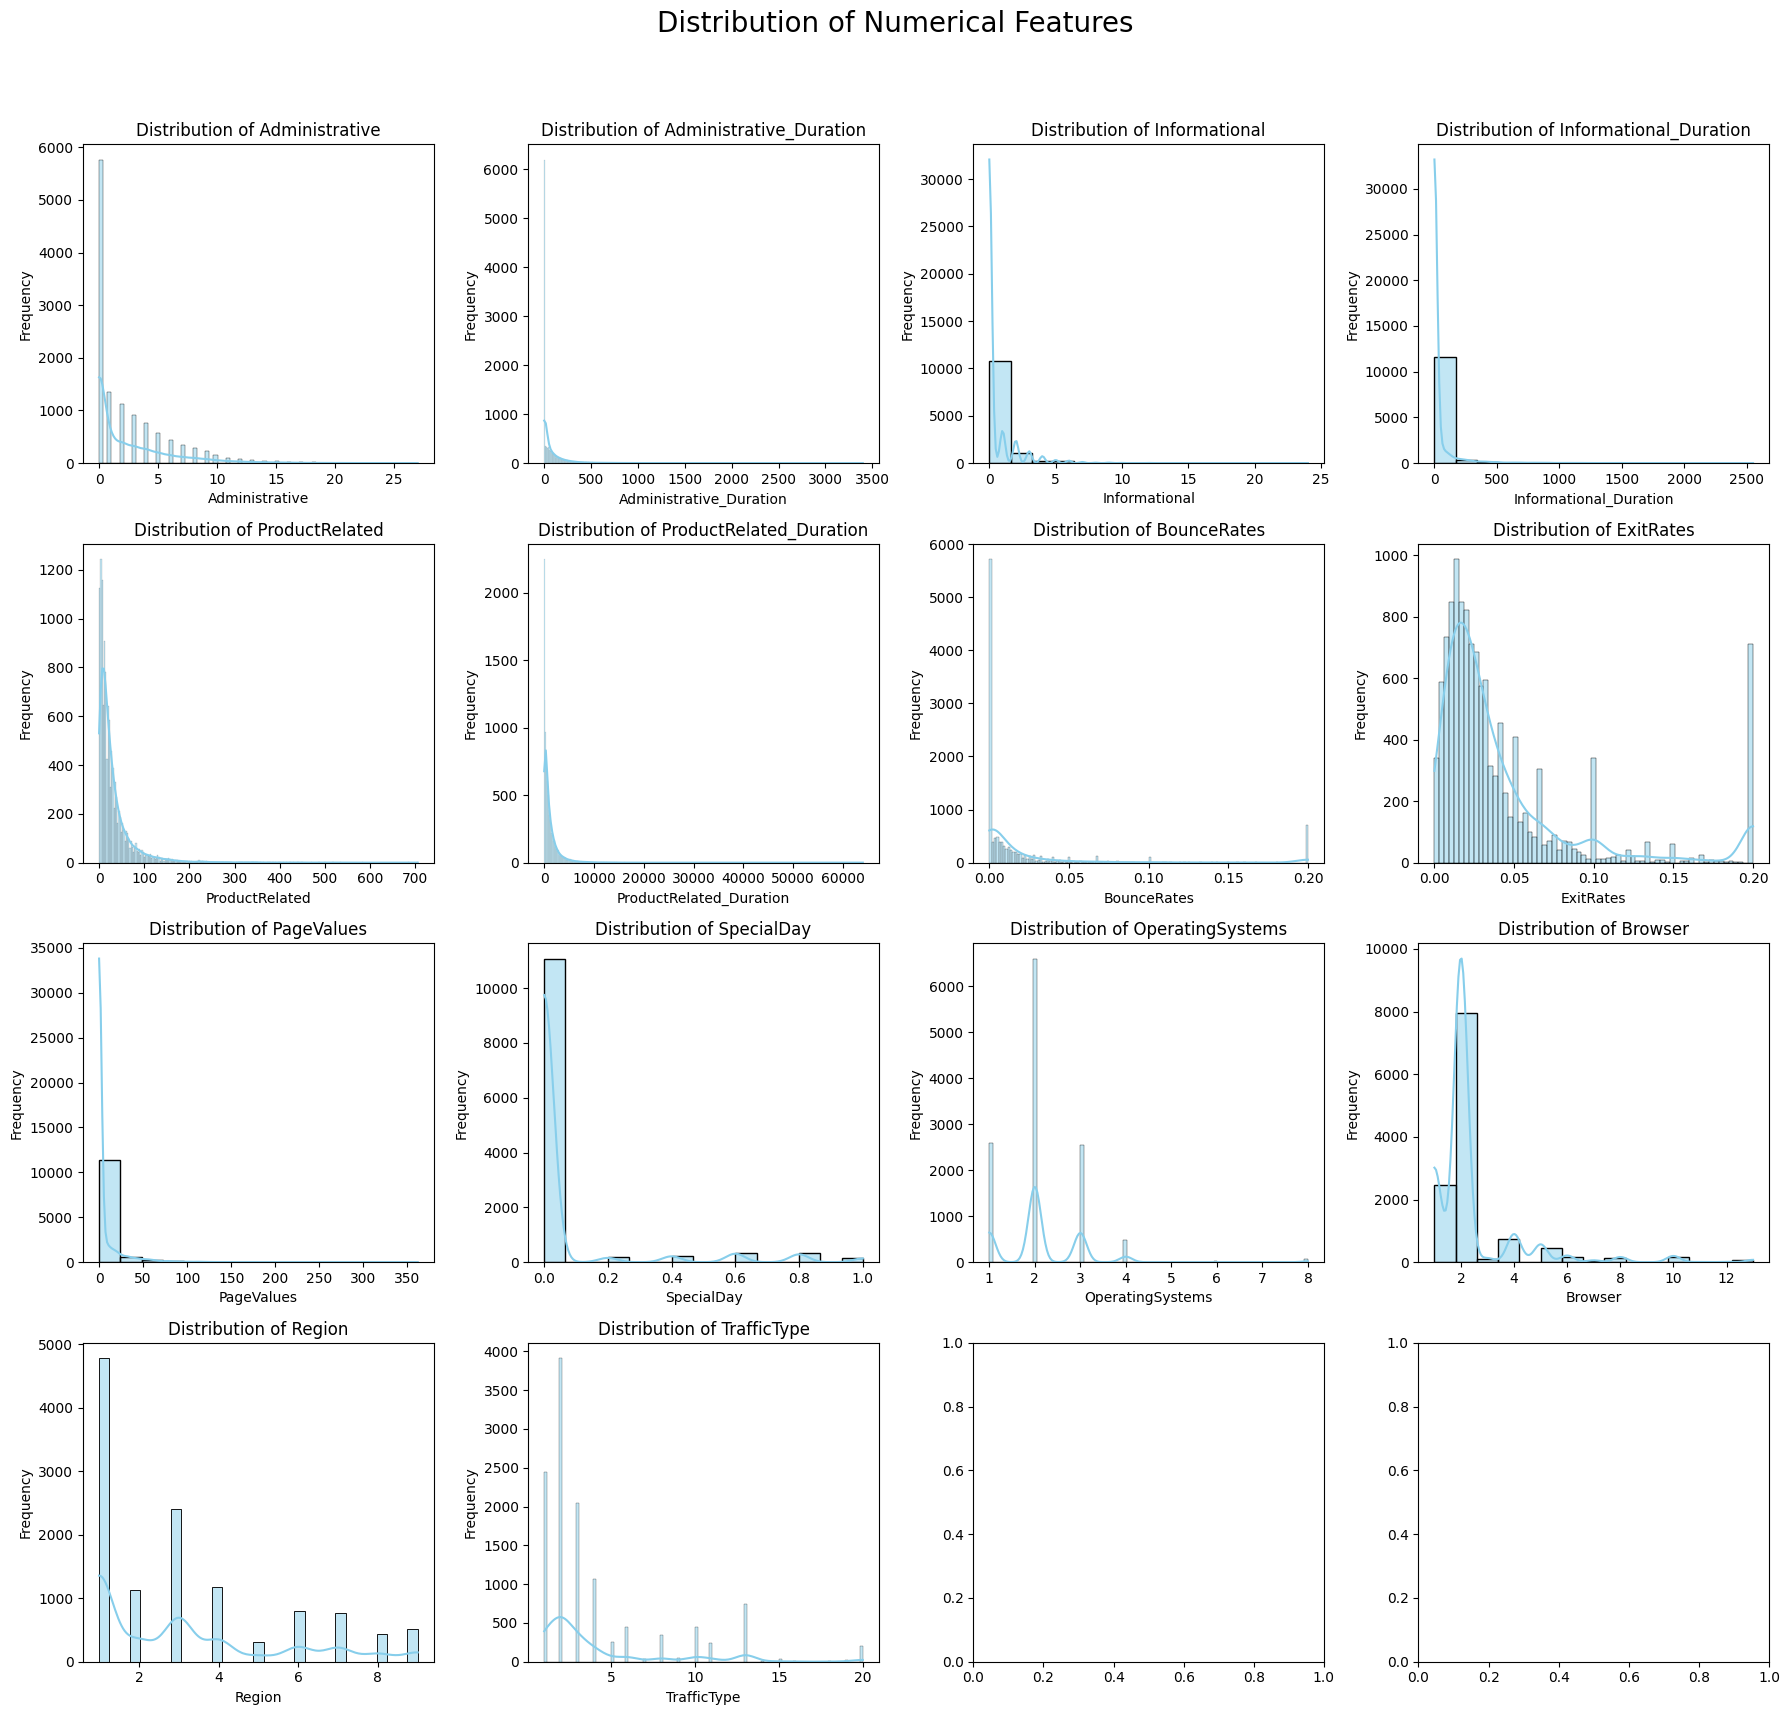

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(18, 18))
fig.suptitle('Distribution of Numerical Features', fontsize=20)
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
for i, feature in enumerate(numerical_features):
    row = i // 4
    col = i % 4
    sns.histplot(df[feature], ax=axes[row, col], kde=True, color='skyblue')
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

/tmp/ipython-input-1018803498.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Revenue', data=df, palette='pastel')


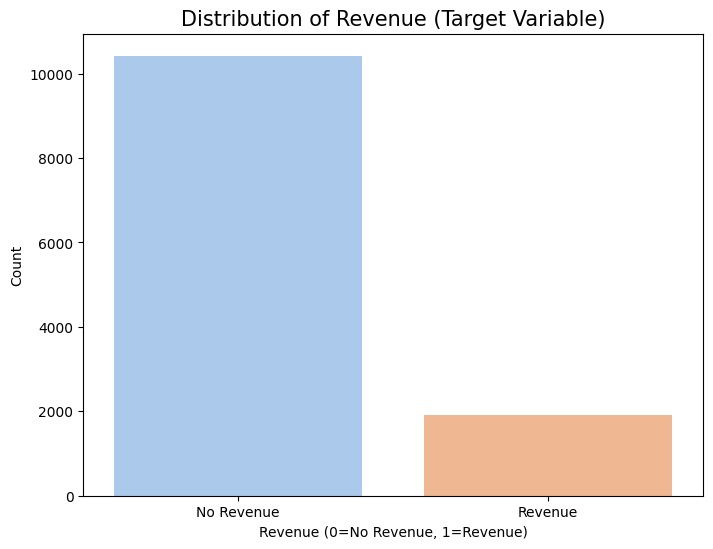

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Revenue', data=df, palette='pastel')
plt.title('Distribution of Revenue (Target Variable)', fontsize=15)
plt.xlabel('Revenue (0=No Revenue, 1=Revenue)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Revenue', 'Revenue'])
plt.show()

/tmp/ipython-input-1711335950.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='VisitorType', data=df, palette='viridis')


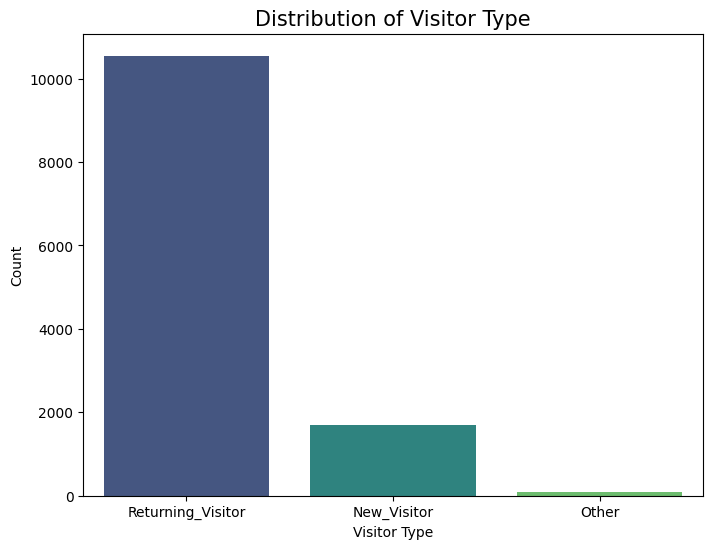

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='VisitorType', data=df, palette='viridis')
plt.title('Distribution of Visitor Type', fontsize=15)
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.show()

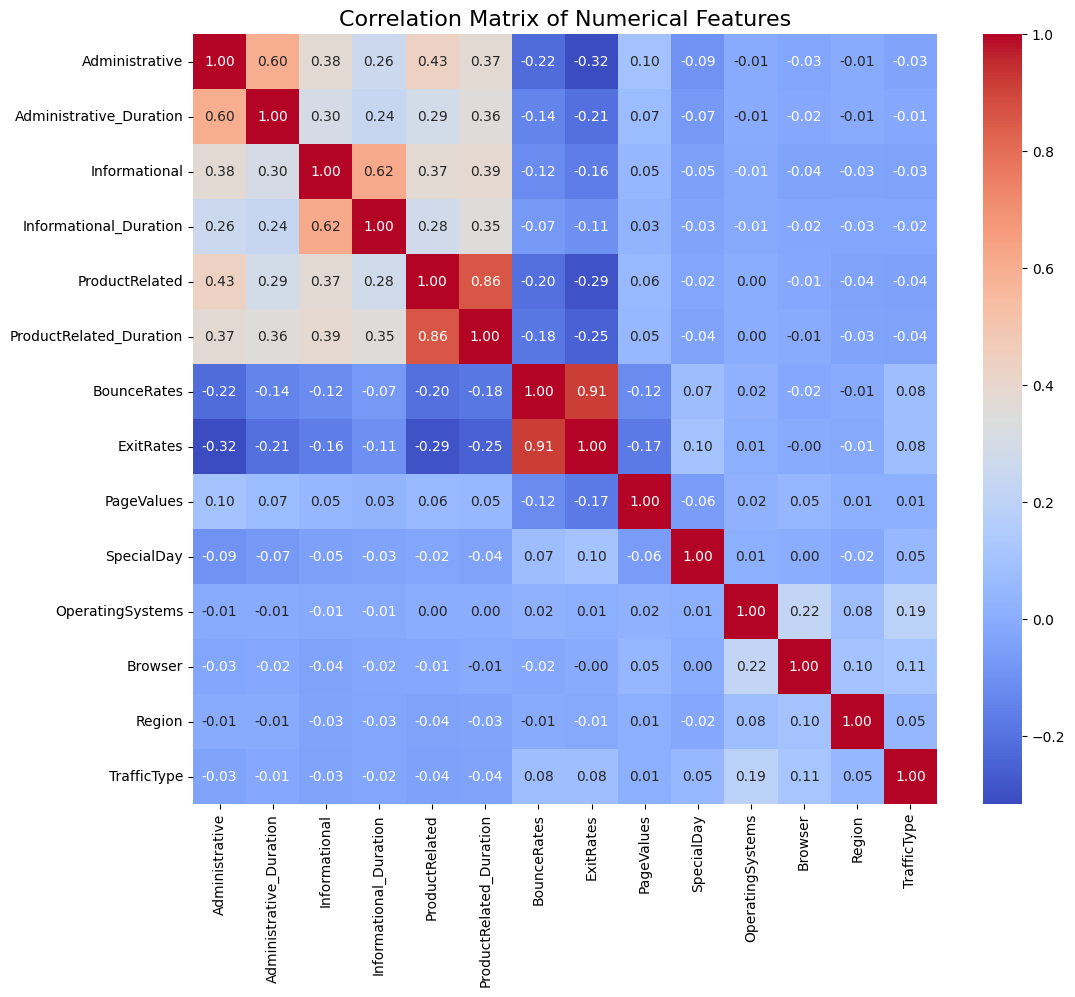

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

/tmp/ipython-input-3785267169.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Revenue', y='PageValues', data=df, palette='Set2')


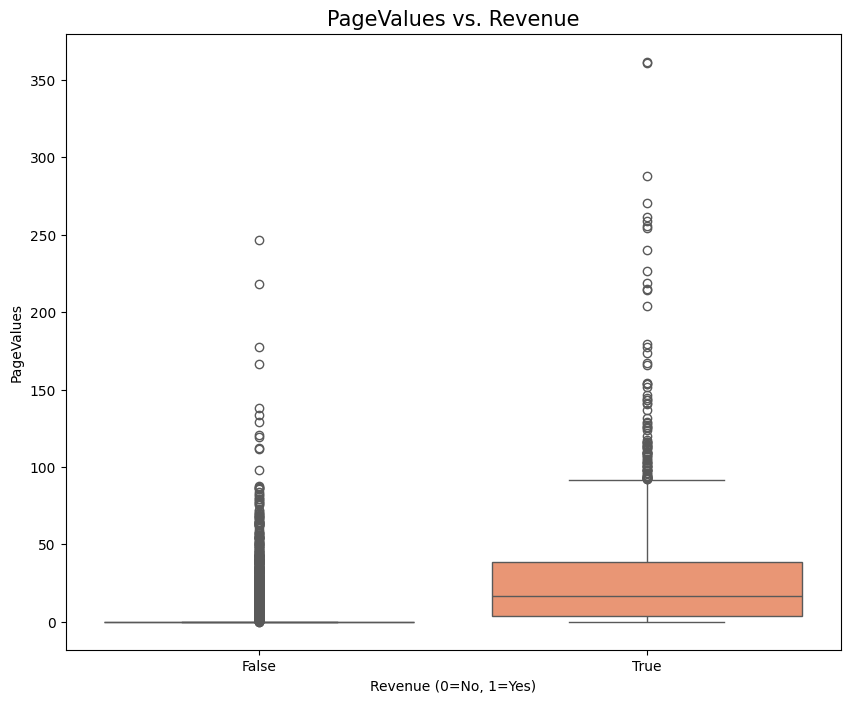

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Revenue', y='PageValues', data=df, palette='Set2')
plt.title('PageValues vs. Revenue', fontsize=15)
plt.xlabel('Revenue (0=No, 1=Yes)')
plt.ylabel('PageValues')
plt.show()


/tmp/ipython-input-2801662776.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Revenue', y='ExitRates', data=df, palette='Set2')


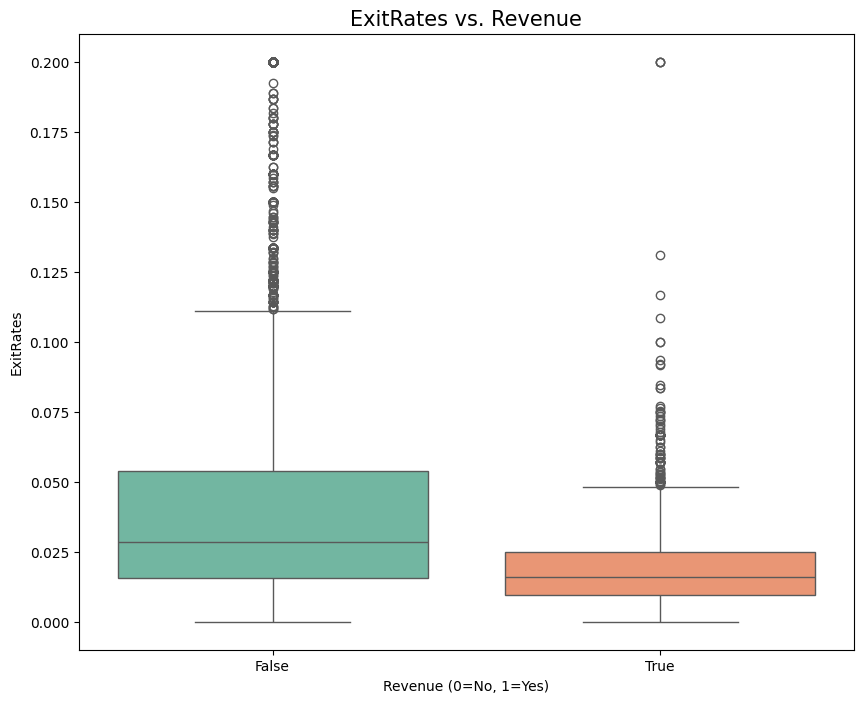

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Revenue', y='ExitRates', data=df, palette='Set2')
plt.title('ExitRates vs. Revenue', fontsize=15)
plt.xlabel('Revenue (0=No, 1=Yes)')
plt.ylabel('ExitRates')
plt.show()

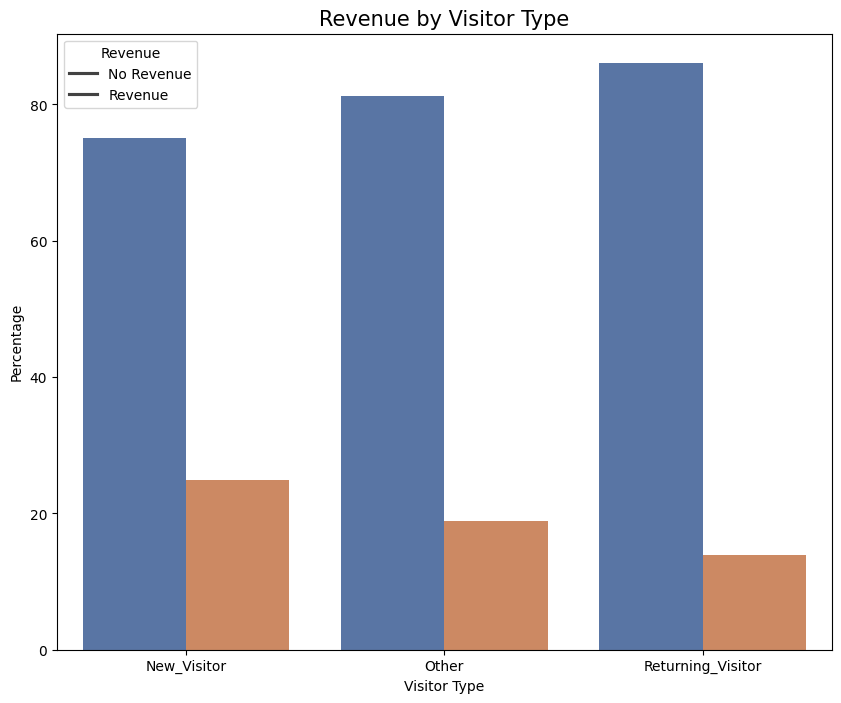

In [ ]:
visitor_revenue = pd.crosstab(df['VisitorType'], df['Revenue'], normalize='index') * 100
visitor_revenue = visitor_revenue.reset_index()
visitor_revenue = visitor_revenue.melt(id_vars='VisitorType', var_name='Revenue', value_name='Percentage')

plt.figure(figsize=(10, 8))
sns.barplot(x='VisitorType', y='Percentage', hue='Revenue', data=visitor_revenue, palette='deep')
plt.title('Revenue by Visitor Type', fontsize=15)
plt.xlabel('Visitor Type')
plt.ylabel('Percentage')
plt.legend(title='Revenue', labels=['No Revenue', 'Revenue'])
plt.show()

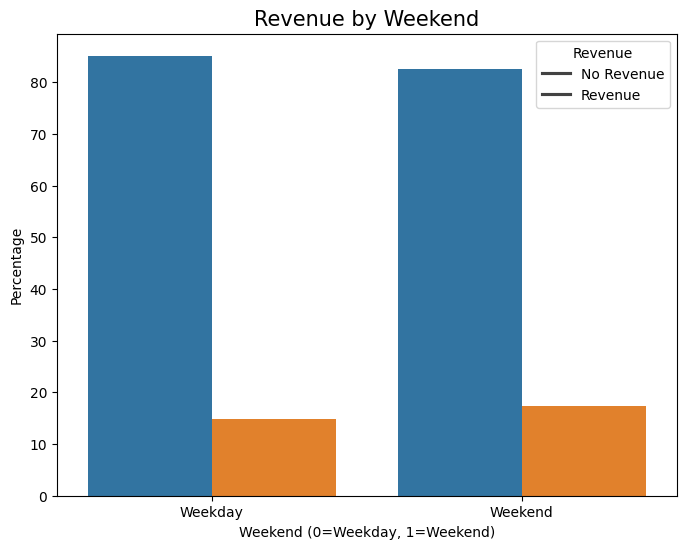

In [ ]:
weekend_revenue = pd.crosstab(df['Weekend'], df['Revenue'], normalize='index') * 100
weekend_revenue = weekend_revenue.reset_index()
weekend_revenue = weekend_revenue.melt(id_vars='Weekend', var_name='Revenue', value_name='Percentage')

plt.figure(figsize=(8, 6))
sns.barplot(x='Weekend', y='Percentage', hue='Revenue', data=weekend_revenue, palette='tab10')
plt.title('Revenue by Weekend', fontsize=15)
plt.xlabel('Weekend (0=Weekday, 1=Weekend)')
plt.ylabel('Percentage')
plt.legend(title='Revenue', labels=['No Revenue', 'Revenue'])
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()


# --- Step 5: Feature Engineering ---

In [ ]:
df_processed['total_duration'] = df_processed['Administrative_Duration'] + df_processed['Informational_Duration'] + df_processed['ProductRelated_Duration']


Created 'total_duration' feature.


In [ ]:
df_processed['total_pages_visited'] = df_processed['Administrative'] + df_processed['Informational'] + df_processed['ProductRelated']


In [ ]:
print(df_processed[['total_duration', 'total_pages_visited', 'Revenue']].head())

   total_duration  total_pages_visited  Revenue
0        0.000000                    1        0
1       64.000000                    2        0
2        0.000000                    1        0
3        2.666667                    2        0
4      627.500000                   10        0


# --- Step 6: Handling Imbalanced Data with SMOTE ---

In [ ]:
X = df_processed.drop('Revenue', axis=1)
y = df_processed['Revenue']

In [ ]:
X = pd.get_dummies(X)

In [ ]:
print("Original class distribution:", Counter(y))

Original class distribution: Counter({0: 10422, 1: 1908})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"\nTraining set shape: {X_train.shape}, Test set shape: {X_test.shape}")
print(f"Original training class distribution: {Counter(y_train)}")


Training set shape: (8631, 32), Test set shape: (3699, 32)
Original training class distribution: Counter({0: 7295, 1: 1336})


In [ ]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
print(f"\nResampled training set shape: {X_train_res.shape}")
print(f"Resampled training class distribution: {Counter(y_train_res)}")


Resampled training set shape: (14590, 32)
Resampled training class distribution: Counter({0: 7295, 1: 7295})


/tmp/ipython-input-1418319792.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_res, palette='pastel')


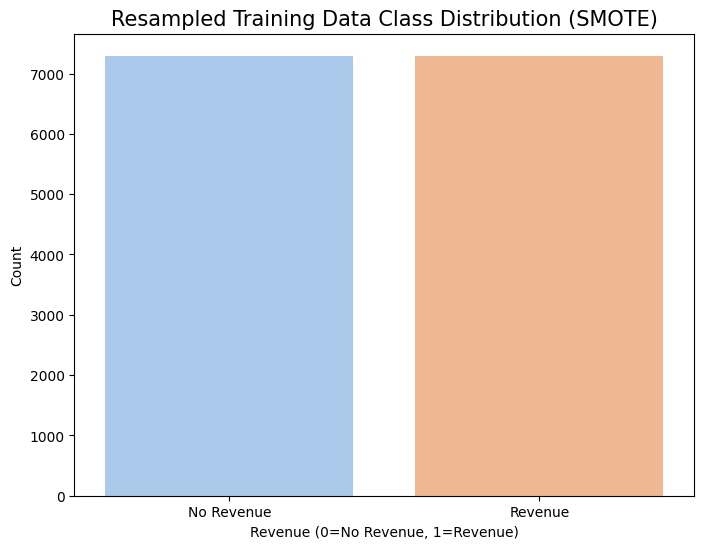

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_res, palette='pastel')
plt.title('Resampled Training Data Class Distribution (SMOTE)', fontsize=15)
plt.xlabel('Revenue (0=No Revenue, 1=Revenue)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Revenue', 'Revenue'])
plt.show()

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train_res, y_train_res)
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

print(f"Best RF hyperparameters: {grid_search_rf.best_params_}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Best RF hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      3127
           1       0.63      0.68      0.65       572

    accuracy                           0.89      3699
   macro avg       0.79      0.80      0.79      3699
weighted avg       0.89      0.89      0.89      3699



In [ ]:
print("\n--- B) Logistic Regression ---")
lr_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
lr_model.fit(X_train_res, y_train_res)
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


--- B) Logistic Regression ---
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3127
           1       0.68      0.47      0.56       572

    accuracy                           0.88      3699
   macro avg       0.79      0.72      0.75      3699
weighted avg       0.87      0.88      0.88      3699



In [ ]:
print("\n--- C) Gradient Boosting Classifier ---")
gb_model = GradientBoostingClassifier(random_state=42)
param_grid_gb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.05]
}
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=3, scoring='f1', n_jobs=-1)
grid_search_gb.fit(X_train_res, y_train_res)
best_gb_model = grid_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)
y_prob_gb = best_gb_model.predict_proba(X_test)[:, 1]

print(f"Best GB hyperparameters: {grid_search_gb.best_params_}")
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


--- C) Gradient Boosting Classifier ---
Best GB hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3127
           1       0.61      0.70      0.65       572

    accuracy                           0.88      3699
   macro avg       0.78      0.81      0.79      3699
weighted avg       0.89      0.88      0.89      3699



In [ ]:
# D) XGBoost Classifier
print("\n--- D) XGBoost Classifier ---")
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.05]
}
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, scoring='f1', n_jobs=-1)
grid_search_xgb.fit(X_train_res, y_train_res)
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
y_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

print(f"Best XGB hyperparameters: {grid_search_xgb.best_params_}")
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


--- D) XGBoost Classifier ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:45:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGB hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3127
           1       0.61      0.70      0.65       572

    accuracy                           0.88      3699
   macro avg       0.78      0.81      0.79      3699
weighted avg       0.89      0.88      0.89      3699



In [ ]:
# E) CatBoost Classifier
print("\n--- E) CatBoost Classifier ---")
# CatBoost handles categorical features automatically, but we've already one-hot encoded them.
cat_model = CatBoostClassifier(random_state=42, verbose=0, early_stopping_rounds=20)
param_grid_cat = {
    'iterations': [50, 100],
    'learning_rate': [0.1, 0.05],
    'depth': [3, 5]
}
grid_search_cat = GridSearchCV(estimator=cat_model, param_grid=param_grid_cat, cv=3, scoring='f1', n_jobs=-1)
grid_search_cat.fit(X_train_res, y_train_res)
best_cat_model = grid_search_cat.best_estimator_
y_pred_cat = best_cat_model.predict(X_test)
y_prob_cat = best_cat_model.predict_proba(X_test)[:, 1]

print(f"Best CatBoost hyperparameters: {grid_search_cat.best_params_}")
print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred_cat))


--- E) CatBoost Classifier ---
Best CatBoost hyperparameters: {'depth': 5, 'iterations': 100, 'learning_rate': 0.05}
CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3127
           1       0.60      0.74      0.66       572

    accuracy                           0.88      3699
   macro avg       0.78      0.83      0.80      3699
weighted avg       0.90      0.88      0.89      3699



In [ ]:
print("\n--- Step 8: Model Stacking ---")
# Create a stacking classifier with the best-performing models as base learners
estimators = [
    ('rf', best_rf_model),
    ('gb', best_gb_model),
    ('xgb', best_xgb_model),
    ('cat', best_cat_model)
]
stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
stack_model.fit(X_train_res, y_train_res)
y_pred_stack = stack_model.predict(X_test)
y_prob_stack = stack_model.predict_proba(X_test)[:, 1]

print("Stacking Classifier Classification Report:")
print(classification_report(y_test, y_pred_stack))


--- Step 8: Model Stacking ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:48:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:49:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:49:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:49:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:49:11] WARNING: /w

Stacking Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      3127
           1       0.64      0.63      0.64       572

    accuracy                           0.89      3699
   macro avg       0.79      0.78      0.79      3699
weighted avg       0.89      0.89      0.89      3699



In [ ]:
print("\n--- Step 9: Advanced Hyperparameter Tuning with Optuna ---")
# Use Optuna to tune the best model identified so far (likely Random Forest or XGBoost)
# We will tune the Random Forest model for this example.

def objective(trial):
    """
    Objective function for Optuna to maximize F1-score.
    """
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 50, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Use cross-validation to get a robust performance score
    score = np.mean(cross_val_score(model, X_train_res, y_train_res, n_jobs=-1, cv=3, scoring='f1'))
    return score

# Create a study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("\nOptuna tuning for Random Forest completed.")
print("Best hyperparameters found by Optuna:", study.best_params)
print("Best F1-score found by Optuna:", study.best_value)

# Train a final model with the best parameters from Optuna
best_optuna_rf = RandomForestClassifier(**study.best_params, random_state=42)
best_optuna_rf.fit(X_train_res, y_train_res)
y_pred_optuna_rf = best_optuna_rf.predict(X_test)
y_prob_optuna_rf = best_optuna_rf.predict_proba(X_test)[:, 1]

print("\nRandom Forest (Optuna) Classification Report:")
print(classification_report(y_test, y_pred_optuna_rf))

[I 2025-08-24 15:50:30,959] A new study created in memory with name: no-name-66d7d30f-00cf-4d20-8324-74d924b16a08



--- Step 9: Advanced Hyperparameter Tuning with Optuna ---


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-08-24 15:50:35,474] Trial 0 finished with value: 0.9328178193525597 and parameters: {'n_estimators': 108, 'max_depth': 43, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.9328178193525597.
[I 2025-08-24 15:50:40,232] Trial 1 finished with value: 0.913634586303381 and parameters: {'n_estimators': 234, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.9328178193525597.
[I 2025-08-24 15:50:50,473] Trial 2 finished with value: 0.9311516070127451 and parameters: {'n_estimators': 252, 'max_depth': 41, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9328178193525597.
[I 2025-08-24 15:50:54,938] Trial 3 finished with value: 0.9252896546925555 and parameters: {'n_estimators': 133, 'max_depth': 16, 'min_samples_split': 16, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.9328178193525597.
[I 2025-08-24 15:51:00,042] Trial 4 finished with value: 0.9144142013134311 and parameters: 

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import cross_val_score
import optuna
import numpy as np

print("\n--- Step 9: Advanced Hyperparameter Tuning with Optuna (CatBoost) ---")

def objective(trial):
    """
    Objective function for Optuna to maximize F1-score on CatBoost.
    """
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0, log=True),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'random_strength': trial.suggest_float('random_strength', 0.0, 10.0),
        'verbose': 0,
        'random_state': 42
    }

    model = CatBoostClassifier(**params)

    # Cross-validation F1-score
    score = np.mean(cross_val_score(
        model, X_train_res, y_train_res,
        n_jobs=-1, cv=3, scoring='f1'
    ))
    return score

# Create a study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("\nOptuna tuning for CatBoost completed.")
print("Best hyperparameters found by Optuna:", study.best_params)
print("Best F1-score found by Optuna:", study.best_value)

# Train final CatBoost model with best params
best_optuna_cat = CatBoostClassifier(**study.best_params, random_state=42, verbose=0)
best_optuna_cat.fit(X_train_res, y_train_res)

# Evaluate on test set
y_pred_optuna_cat = best_optuna_cat.predict(X_test)
y_prob_optuna_cat = best_optuna_cat.predict_proba(X_test)[:, 1]

print("\nCatBoost (Optuna) Classification Report:")
print(classification_report(y_test, y_pred_optuna_cat))


[I 2025-08-24 16:04:25,458] A new study created in memory with name: no-name-1ad27c6e-9f5d-463c-8f52-a3fd46fcae92



--- Step 9: Advanced Hyperparameter Tuning with Optuna (CatBoost) ---


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-08-24 16:04:36,953] Trial 0 finished with value: 0.9145659562202888 and parameters: {'iterations': 712, 'depth': 3, 'learning_rate': 0.019751179652359282, 'l2_leaf_reg': 1.1354914128581886, 'border_count': 153, 'bagging_temperature': 0.6785045837001271, 'random_strength': 4.204930451694309}. Best is trial 0 with value: 0.9145659562202888.
[I 2025-08-24 16:04:44,738] Trial 1 finished with value: 0.9118250106855036 and parameters: {'iterations': 813, 'depth': 4, 'learning_rate': 0.06844998657898176, 'l2_leaf_reg': 0.0028203159829018037, 'border_count': 77, 'bagging_temperature': 0.4454707705676416, 'random_strength': 3.0535301042360476}. Best is trial 0 with value: 0.9145659562202888.
[I 2025-08-24 16:04:46,397] Trial 2 finished with value: 0.9161267873836882 and parameters: {'iterations': 105, 'depth': 5, 'learning_rate': 0.11115304814167418, 'l2_leaf_reg': 0.03208859248671319, 'border_count': 226, 'bagging_temperature': 0.822449038110869, 'random_strength': 3.647349656891455}. 


--- Final Model Comparison Summary ---
                          Accuracy  Precision  Recall  F1-Score  ROC-AUC
Model                                                                   
Random Forest (Grid)        0.8889     0.6300  0.6818    0.6549   0.9181
Logistic Regression         0.8838     0.6775  0.4738    0.5576   0.8883
Gradient Boosting (Grid)    0.8835     0.6067  0.7010    0.6504   0.9256
XGBoost (Grid)              0.8848     0.6109  0.7028    0.6537   0.9261
CatBoost (Grid)             0.8835     0.5997  0.7413    0.6630   0.9262
Stacking Classifier         0.8886     0.6423  0.6311    0.6367   0.9054
Random Forest (Optuna)      0.8886     0.6270  0.6906    0.6572   0.9192


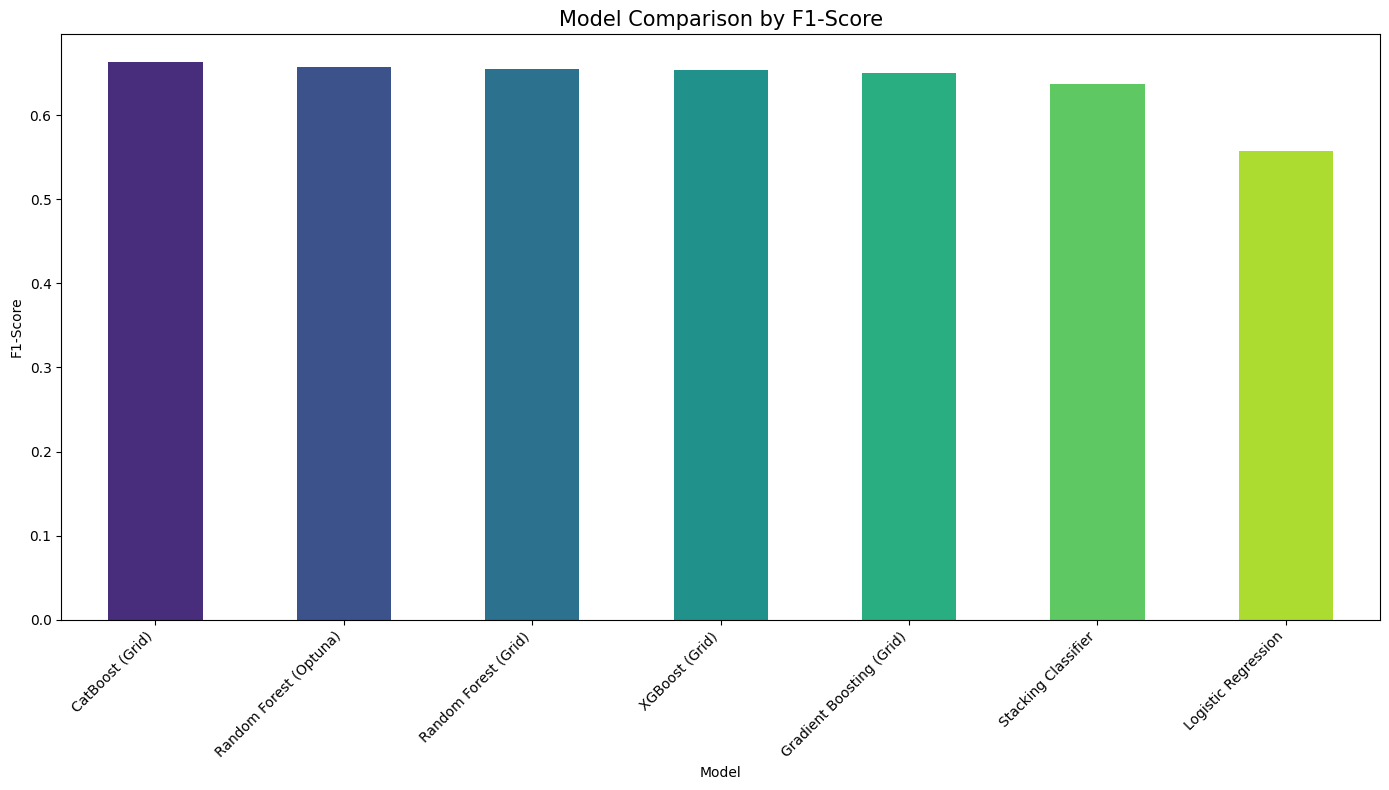

In [ ]:
print("\n--- Final Model Comparison Summary ---")
# Create a dictionary to store the results
results = {
    'Model': ['Random Forest (Grid)', 'Logistic Regression', 'Gradient Boosting (Grid)', 'XGBoost (Grid)', 'CatBoost (Grid)', 'Stacking Classifier', 'Random Forest (Optuna)'],
    'Accuracy': [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_gb), accuracy_score(y_test, y_pred_xgb), accuracy_score(y_test, y_pred_cat), accuracy_score(y_test, y_pred_stack), accuracy_score(y_test, y_pred_optuna_rf)],
    'Precision': [precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_gb), precision_score(y_test, y_pred_xgb), precision_score(y_test, y_pred_cat), precision_score(y_test, y_pred_stack), precision_score(y_test, y_pred_optuna_rf)],
    'Recall': [recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_gb), recall_score(y_test, y_pred_xgb), recall_score(y_test, y_pred_cat), recall_score(y_test, y_pred_stack), recall_score(y_test, y_pred_optuna_rf)],
    'F1-Score': [f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_gb), f1_score(y_test, y_pred_xgb), f1_score(y_test, y_pred_cat), f1_score(y_test, y_pred_stack), f1_score(y_test, y_pred_optuna_rf)],
    'ROC-AUC': [roc_auc_score(y_test, y_prob_rf), roc_auc_score(y_test, y_prob_lr), roc_auc_score(y_test, y_prob_gb), roc_auc_score(y_test, y_prob_xgb), roc_auc_score(y_test, y_prob_cat), roc_auc_score(y_test, y_prob_stack), roc_auc_score(y_test, y_prob_optuna_rf)]
}

# Convert the dictionary to a DataFrame for clean presentation
results_df = pd.DataFrame(results).set_index('Model').round(4)
print(results_df)

# Visualize the F1-Scores for comparison
results_df.sort_values(by='F1-Score', ascending=False)['F1-Score'].plot(kind='bar', figsize=(14, 8), color=sns.color_palette("viridis", len(results_df)))
plt.title('Model Comparison by F1-Score', fontsize=15)
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()